In [15]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.fftpack import dct
file = '/content/LJ001-0001.wav'
signal, sample_rate = librosa.load(file, sr=None)

**Extracting 25 ms frame and applying hamming window**

In [16]:
frame_length = int(0.025 * sample_rate)
frame = signal[1000:1000 + frame_length]
windowed_frame = frame * np.hamming(frame_length)

**Computing DFT and DCT of the windowed frame**

In [17]:
dft_full = np.fft.fft(windowed_frame)
dft_magnitude = np.abs(dft_full)
dft_result = dft_magnitude[:frame_length // 2]
total_dft_energy = np.sum(dft_magnitude ** 2)

dct_result = np.abs(dct(windowed_frame, type=2, norm='ortho'))
total_dct_energy = np.sum(dct_result ** 2)

**Comparing energy compaction**

In [18]:
def energy_compaction(coeffs, N, total_energy):
    compacted_energy = np.sum(coeffs[:N] ** 2)
    return 100 * compacted_energy / total_energy

Ns = [10, 20, 30, 40]
dft_energies = []
dct_energies = []

print("Energy Compaction Results:")
for N in Ns:
    dft_energy = energy_compaction(dft_result, N, total_dft_energy)
    dct_energy = energy_compaction(dct_result, N, total_dct_energy)
    dft_energies.append(dft_energy)
    dct_energies.append(dct_energy)
    print(f"{N} Coefficients:")
    print(f"  DFT Energy %: {dft_energy:.4f}")
    print(f"  DCT Energy %: {dct_energy:.4f}")

Energy Compaction Results:
10 Coefficients:
  DFT Energy %: 8.9257
  DCT Energy %: 0.0221
20 Coefficients:
  DFT Energy %: 41.9427
  DCT Energy %: 35.1214
30 Coefficients:
  DFT Energy %: 49.0334
  DCT Energy %: 81.0696
40 Coefficients:
  DFT Energy %: 49.3257
  DCT Energy %: 86.3205


**Plotting energy compaction comparison**

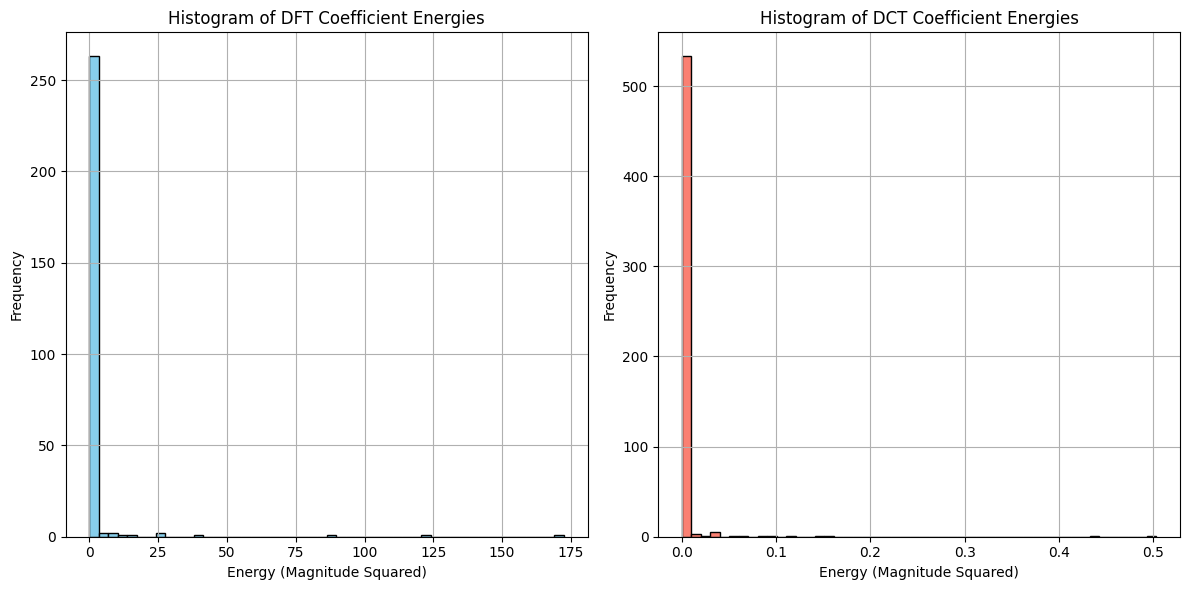

In [23]:
plt.figure(figsize=(12, 6))

# Histogram of DFT magnitudes
plt.subplot(1, 2, 1)
plt.hist(dft_result**2, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of DFT Coefficient Energies')
plt.xlabel('Energy (Magnitude Squared)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram of DCT magnitudes
plt.subplot(1, 2, 2)
plt.hist(dct_result**2, bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of DCT Coefficient Energies')
plt.xlabel('Energy (Magnitude Squared)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

**Task 2**

**Extracting 13 MFCC's from the audio signal**

In [24]:
mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

**Plotting MFCC coefficients over time**

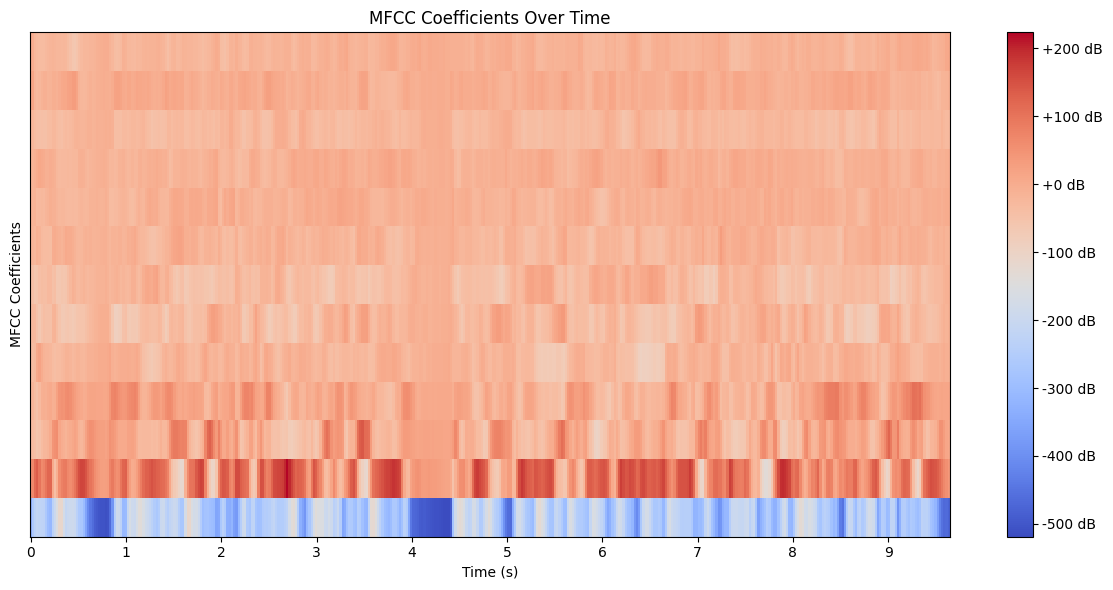

In [26]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Coefficients Over Time')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

**Plotting first three MFCCs to capture the spectral envelope**

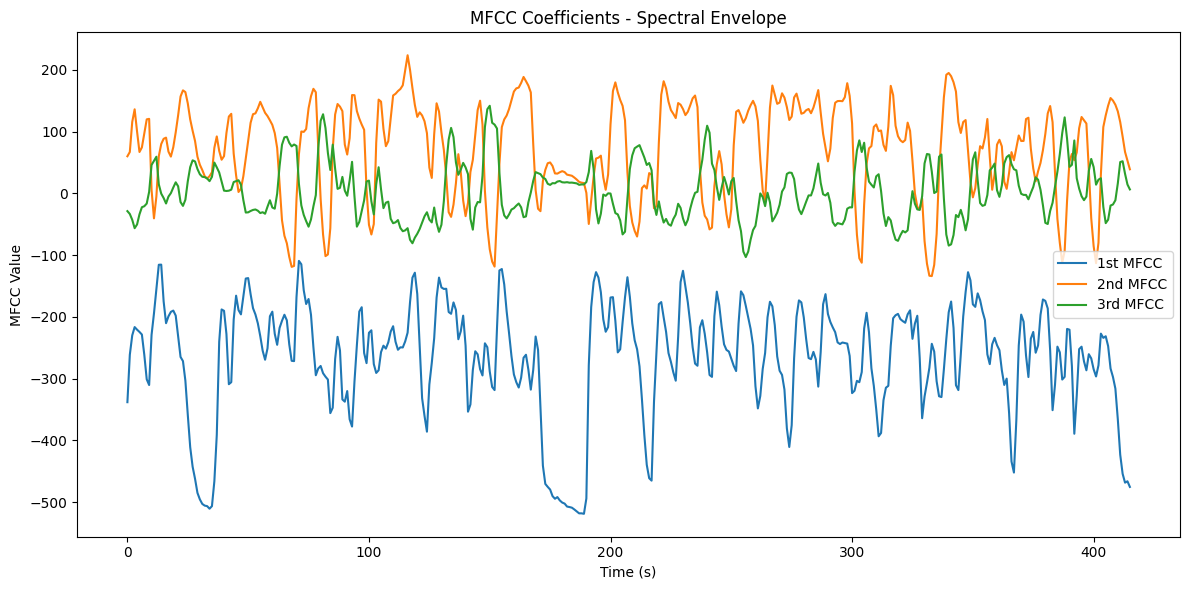

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(mfcc[0], label="1st MFCC")
plt.plot(mfcc[1], label="2nd MFCC")
plt.plot(mfcc[2], label="3rd MFCC")
plt.title('MFCC Coefficients - Spectral Envelope')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Value')
plt.legend()
plt.tight_layout()
plt.show()